# 1. Dataset Overview

- Name: CIFAR-10
- Description: CIFAR-10 is a collection of 60,000 32x32 color images in 10 classes, with 6,000 images per class.
- Classes: Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck.
- Motivation: The dataset is ideal for learning as it is small enough to train within a reasonable time and complex enough to require meaningful architectures.

In [11]:
from keras.datasets import cifar10

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
labels = {
    0:"airplane",
    1:"automobile",
    2:"bird",
    3:"cat",
    4:"deer",
    5:"dog",
    6:"frog",
    7:"horse",
    8:"ship",
    9:"truck"
}

In [14]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

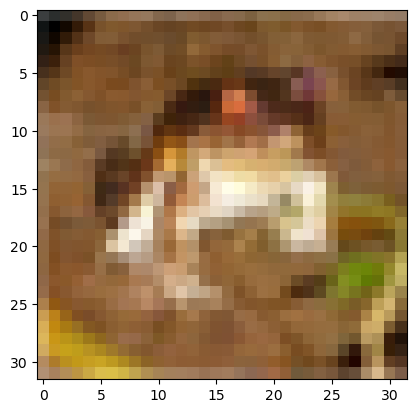

In [15]:
plt.imshow(x_train[0])
plt.show()

In [16]:
labels[y_train[0][0]]

'frog'

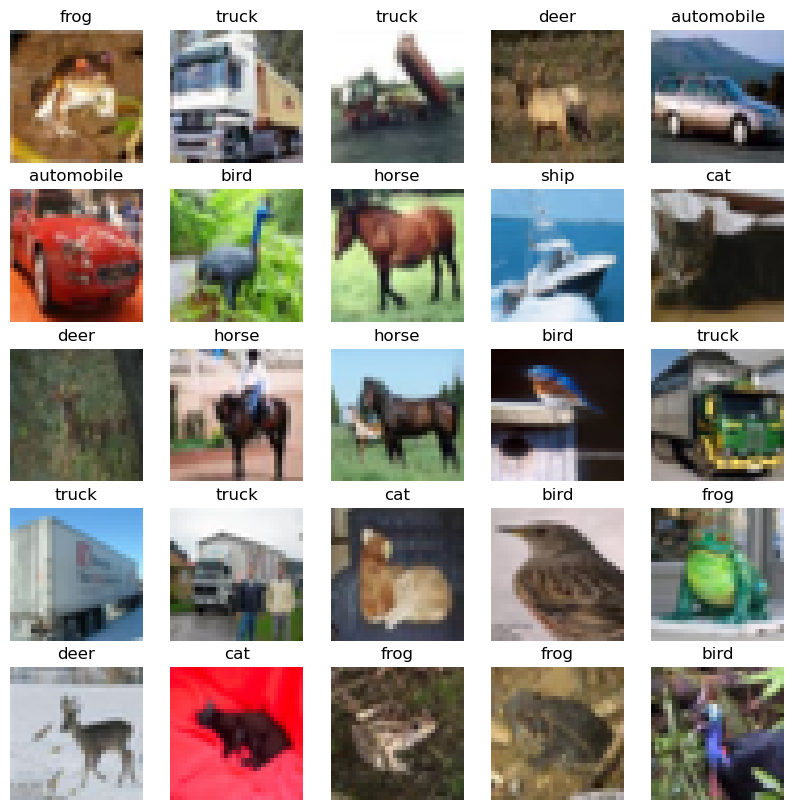

In [17]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(labels[y_train[i][0]])
    plt.axis('off')
plt.show()


# 2. Sigmoid and ReLU Layers

In [19]:
class Sigmoid:
    def forward(self, x):
       self.output = 1 / (1 + np.exp(-x))
       return self.output

    def backward(self, grad):
        return grad * (self.output * (1 - self.output))

class ReLU:
    def forward(self, x):
        self.input = x
        self.output = np.maximum(0, x)
        return self.output

    def backward(self, grad):
        return grad * (self.input > 0).astype(float)

# Example input data
x = np.array([[0.5, -1.0], [2.0, -0.5]])

# Sigmoid forward pass
sigmoid_layer = Sigmoid()
sigmoid_output = sigmoid_layer.forward(x)
print("Sigmoid Forward Output:\n", sigmoid_output)

# ReLU forward pass
relu_layer = ReLU()
relu_output = relu_layer.forward(x)
print("ReLU Forward Output:\n", relu_output)

# Example gradient from next layer
grad = np.array([[0.1, 0.2], [0.3, 0.4]])

# Sigmoid backward pass
sigmoid_grad = sigmoid_layer.backward(grad)
print("Sigmoid Backward Gradient:\n", sigmoid_grad)

# ReLU backward pass
relu_grad = relu_layer.backward(grad)
print("ReLU Backward Gradient:\n", relu_grad)


Sigmoid Forward Output:
 [[0.62245933 0.26894142]
 [0.88079708 0.37754067]]
ReLU Forward Output:
 [[0.5 0. ]
 [2.  0. ]]
Sigmoid Backward Gradient:
 [[0.02350037 0.03932239]
 [0.03149808 0.09400148]]
ReLU Backward Gradient:
 [[0.1 0. ]
 [0.3 0. ]]


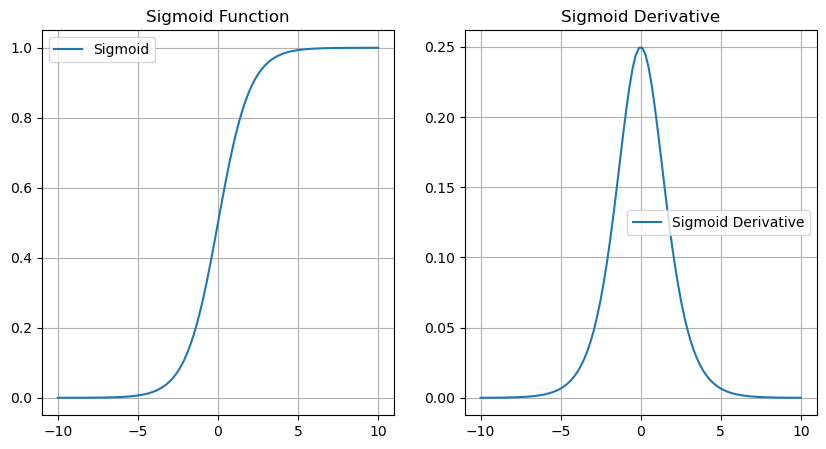

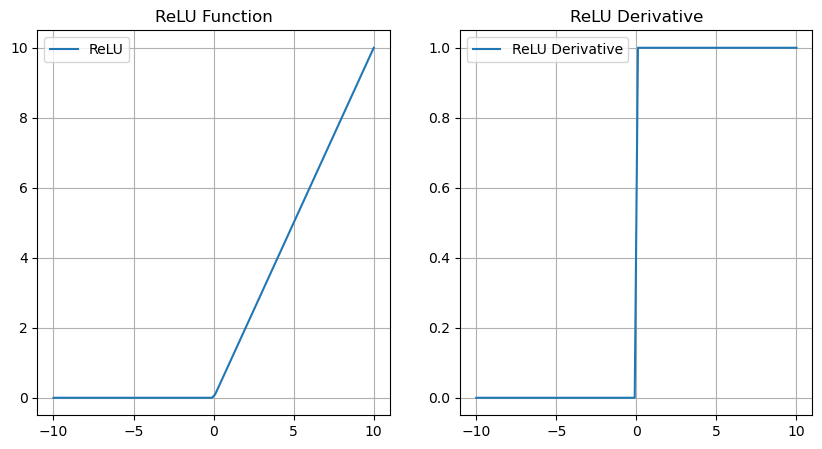

In [20]:
# Plot Sigmoid
x = np.linspace(-10, 10, 100)
sigmoid_output = 1 / (1 + np.exp(-x))
sigmoid_derivative = sigmoid_output * (1 - sigmoid_output)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, sigmoid_output, label="Sigmoid")
plt.title("Sigmoid Function")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, sigmoid_derivative, label="Sigmoid Derivative")
plt.title("Sigmoid Derivative")
plt.grid()
plt.legend()
plt.show()

# Plot ReLU
relu_output = np.maximum(0, x)
relu_derivative = (x > 0).astype(float)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, relu_output, label="ReLU")
plt.title("ReLU Function")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, relu_derivative, label="ReLU Derivative")
plt.title("ReLU Derivative")
plt.grid()
plt.legend()
plt.show()
